In [1]:
import os
import pandas as pd

# Define the folder path where all the Excel files are stored
folder_path = r"C:\Users\KabeerMotwani\OneDrive - Prime Trading Group\work\alarm report from outlook"

# Initialize an empty list to store DataFrames
all_dataframes = []

# Loop through each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".XLS"):  # Only process .XLS files
        file_path = os.path.join(folder_path, file_name)
        try:
            # Attempt to read the file with xlrd engine
            df = pd.read_excel(file_path, engine='xlrd')
            if not df.empty:  # Ensure the DataFrame is not empty
                all_dataframes.append(df)
                print(f"Successfully loaded: {file_name} - {df.shape[0]} rows")
            else:
                print(f"File is empty: {file_name}")
        except Exception as e:
            print(f"Error reading file {file_name}: {e}")

# Combine all the DataFrames into a single DataFrame
if all_dataframes:
    combined_df = pd.concat(all_dataframes, ignore_index=True)
    print(f"\nCombined DataFrame created with {combined_df.shape[0]} rows and {combined_df.shape[1]} columns.")
    

else:
    print("\nNo valid DataFrames were found to combine.")

Successfully loaded: s49-638460873411201718.XLS - 20359 rows
Successfully loaded: s49-638461737405002388.XLS - 23937 rows
Successfully loaded: s49-638462601399202060.XLS - 25809 rows
Successfully loaded: s49-638463465393240742.XLS - 26860 rows
Successfully loaded: s49-638464329427647228.XLS - 20522 rows
Successfully loaded: s49-638465193417659408.XLS - 25500 rows
Successfully loaded: s49-638466057385413024.XLS - 27301 rows
Successfully loaded: s49-638466921344391949.XLS - 20251 rows
Successfully loaded: s49-638467785405766226.XLS - 20174 rows
Successfully loaded: s49-638468649379425678.XLS - 25685 rows
Successfully loaded: s49-638471241428368507.XLS - 21981 rows
Successfully loaded: s49-638472105408768536.XLS - 22774 rows
Successfully loaded: s49-638472969410716771.XLS - 24460 rows
Successfully loaded: s49-638473833424073473.XLS - 24995 rows
Successfully loaded: s49-638474697364101268.XLS - 29213 rows
Successfully loaded: s49-638475561397646922.XLS - 28294 rows
Successfully loaded: s49

In [6]:
filtered_df = combined_df[combined_df['Handling Time'].notna()]
print(filtered_df.shape)
filtered_df.head()

(1218746, 10)


,Site Name,Post Code,Link Account,Event Date,Event Time,Event Detail,Resolution,Handling Time,Installer,Operator
1,Citizens Theatre,G5 9DS,Keir Construction,14/03/2024,18:50:09,Line Crossed T:TA504(2) A:1 C:14 Cam 14 2024/3...,Security Branded Person on Site,00:31:09,Prime Secure,DA
3,Citizens Theatre,G5 9DS,Keir Construction,14/03/2024,19:28:54,Line Crossed T:TA489(1) A:1 C:14 Cam 14 2024/3...,Activation outside Protected Area,00:10:36,Prime Secure,DA
6,Citizens Theatre,G5 9DS,Keir Construction,14/03/2024,20:48:35,Line Crossed T:TA213(3) A:1 C:7 Cam7 2024/3/14...,Activation outside Protected Area,00:00:30,Prime Secure,SE
8,Citizens Theatre,G5 9DS,Keir Construction,14/03/2024,22:09:57,Line Crossed T:TA504(2) A:1 C:12 Cam 12 2024/3...,No Visible Cause,00:00:10,Prime Secure,DA
10,Citizens Theatre,G5 9DS,Keir Construction,15/03/2024,01:56:04,Line Crossed T:TA489(1) A:1 C:14 Cam 14 2024/3...,Security Branded Person on Site,00:04:52,Prime Secure,SE


C:\Users\KabeerMotwani\AppData\Local\Temp\ipykernel_20512\285980950.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  filtered_df['Event Date'] = pd.to_datetime(filtered_df['Event Date'], errors='coerce')
C:\Users\KabeerMotwani\AppData\Local\Temp\ipykernel_20512\285980950.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Event Date'] = pd.to_datetime(filtered_df['Event Date'], errors='coerce')
C:\Users\KabeerMotwani\AppData\Local\Temp\ipykernel_20512\285980950.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

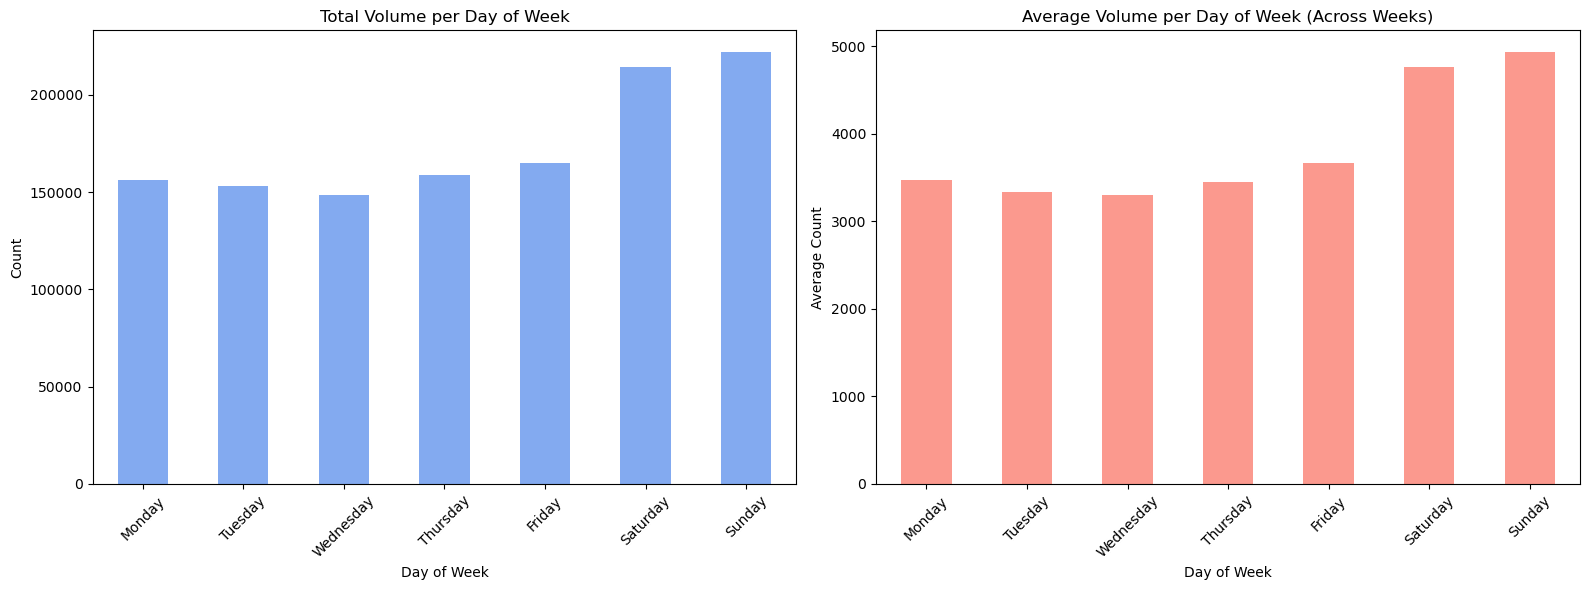

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

filtered_df['Event Date'] = pd.to_datetime(filtered_df['Event Date'], errors='coerce')
filtered_df['DayOfWeek'] = filtered_df['Event Date'].dt.day_name()
volume_per_day = filtered_df.groupby('DayOfWeek').size()

# Ensure the day order is Monday-Sunday
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
volume_per_day = volume_per_day.reindex(ordered_days, fill_value=0)

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)  # side-by-side subplots
volume_per_day.plot(kind='bar', color='cornflowerblue', alpha=0.8)
plt.title("Total Volume per Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Calculate average per day-of-week across weeks:
daily_volume = filtered_df.groupby(['Event Date', 'DayOfWeek']).size().reset_index(name='Count')
daily_volume['Event Date'] = pd.to_datetime(daily_volume['Event Date'])
daily_volume['week'] = daily_volume['Event Date'].dt.isocalendar().week
daily_volume['year'] = daily_volume['Event Date'].dt.isocalendar().year

# Sum daily counts by (day-of-week, year, week)
grouped = daily_volume.groupby(['DayOfWeek', 'year', 'week'])['Count'].sum().reset_index()

# Mean across all year/week combos for each day-of-week
average_per_day = grouped.groupby('DayOfWeek')['Count'].mean().reindex(ordered_days, fill_value=0)

# Plot average volume per day-of-week
plt.subplot(1, 2, 2)
average_per_day.plot(kind='bar', color='salmon', alpha=0.8)
plt.title("Average Volume per Day of Week (Across Weeks)")
plt.xlabel("Day of Week")
plt.ylabel("Average Count")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

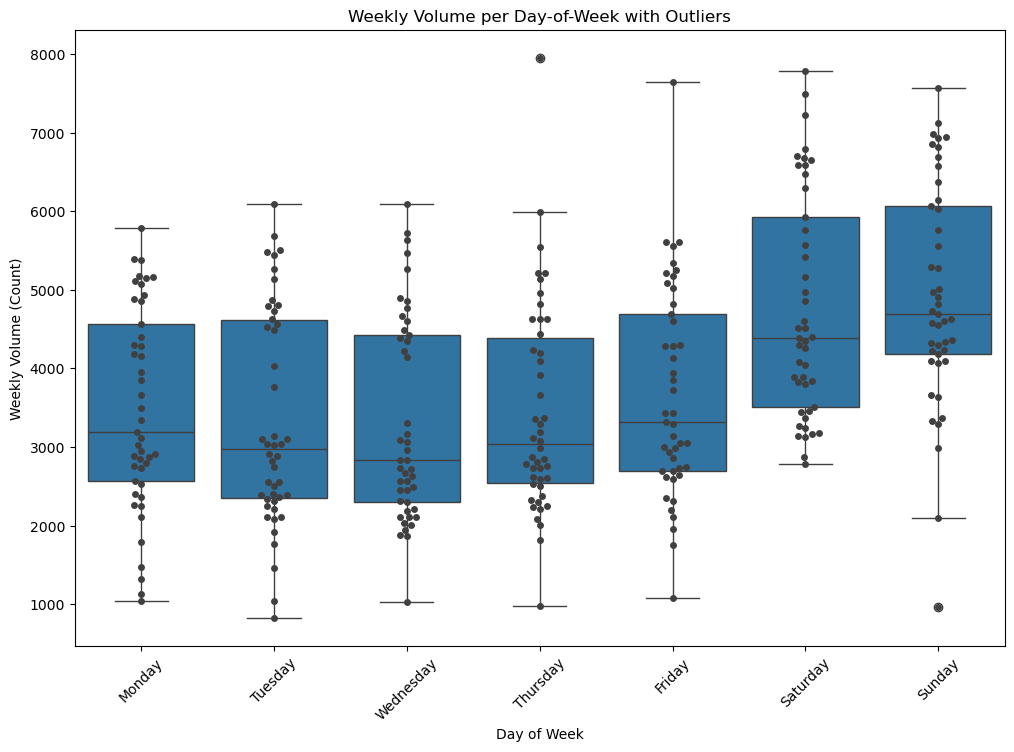

Detected outliers per day-of-week:
Monday: None
Tuesday: None
Wednesday: None
Thursday: [7950]
Friday: None
Saturday: None
Sunday: [960]


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Using the previously computed 'grouped' DataFrame (which has the columns: DayOfWeek, year, week, Count)
# First, create a boxplot (with a swarmplot overlay) to visually inspect outliers per day-of-week
plt.figure(figsize=(12, 8))
sns.boxplot(x='DayOfWeek', y='Count', data=grouped, order=ordered_days)
sns.swarmplot(x='DayOfWeek', y='Count', data=grouped, order=ordered_days, color=".25")
plt.title("Weekly Volume per Day-of-Week with Outliers")
plt.xlabel("Day of Week")
plt.ylabel("Weekly Volume (Count)")
plt.xticks(rotation=45)
plt.show()

# Next, programmatically detect outliers using the IQR method for each day-of-week
outliers = {}
for day in ordered_days:
    day_data = grouped.loc[grouped['DayOfWeek'] == day, 'Count']
    Q1 = day_data.quantile(0.25)
    Q3 = day_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_condition = (day_data < lower_bound) | (day_data > upper_bound)
    outlier_values = day_data[outlier_condition]
    outliers[day] = outlier_values.tolist()

print("Detected outliers per day-of-week:")
for day, vals in outliers.items():
    print(f"{day}: {vals if vals else 'None'}")

The eight days (with the lowest alarm counts) with less than 1150 alarms and their counts:
Event Date
2024-08-06     826
2024-09-01     960
2024-08-01     980
2024-11-06    1024
2024-09-02    1037
2024-10-15    1046
2024-09-13    1079
2024-09-16    1130
dtype: int64


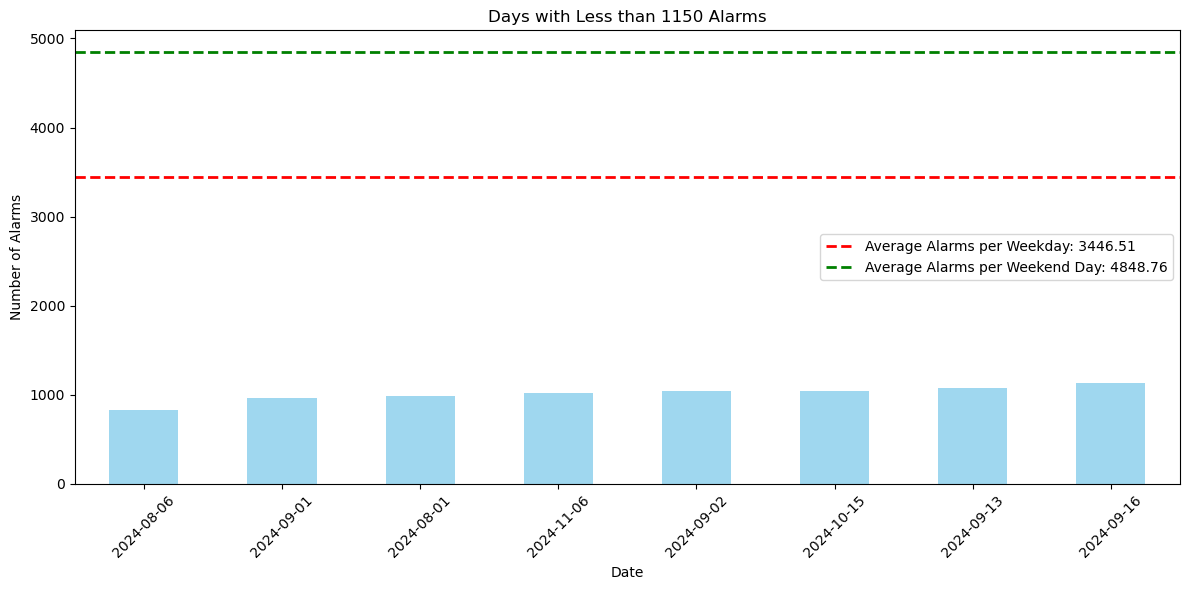

In [26]:
# Group by the date (extracting only the date part) and count alarms per day
daily_counts = filtered_df.groupby(filtered_df['Event Date'].dt.date).size()

# Filter for days with fewer than 1150 alarms
low_alarm_days = daily_counts[daily_counts < 1150]

# If exactly three days match, print them; otherwise, print the first three from sorted values
if len(low_alarm_days) == 3:
    print("The three days with less than 1150 alarms and their counts:")
    print(low_alarm_days)
else:
    low_alarm_days_sorted = low_alarm_days.sort_values()
    print("The eight days (with the lowest alarm counts) with less than 1150 alarms and their counts:")
    print(low_alarm_days_sorted.head(20))
    plt.figure(figsize=(12, 6))
    low_alarm_days_sorted.head(8).plot(kind='bar', color='skyblue', alpha=0.8)
    plt.title("Days with Less than 1150 Alarms")
    plt.xlabel("Date")
    plt.ylabel("Number of Alarms")
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Calculate the average number of alarms per weekday (Monday to Friday)
    weekdays = daily_counts[daily_counts.index.to_series().apply(lambda x: x.weekday() < 5)]
    average_alarms_per_weekday = weekdays.mean()

    # Add a reference line for the average number of alarms per weekday
    plt.axhline(y=average_alarms_per_weekday, color='red', linestyle='--', linewidth=2, label=f'Average Alarms per Weekday: {average_alarms_per_weekday:.2f}')
    
    # Calculate the average number of alarms per weekend day (Saturday and Sunday)
    weekend_days = daily_counts[daily_counts.index.to_series().apply(lambda x: x.weekday() >= 5)]
    average_alarms_per_weekend_day = weekend_days.mean()

    # Add a reference line for the average number of alarms per weekend day
    plt.axhline(y=average_alarms_per_weekend_day, color='green', linestyle='--', linewidth=2, label=f'Average Alarms per Weekend Day: {average_alarms_per_weekend_day:.2f}')
    
    plt.legend()
    plt.show()

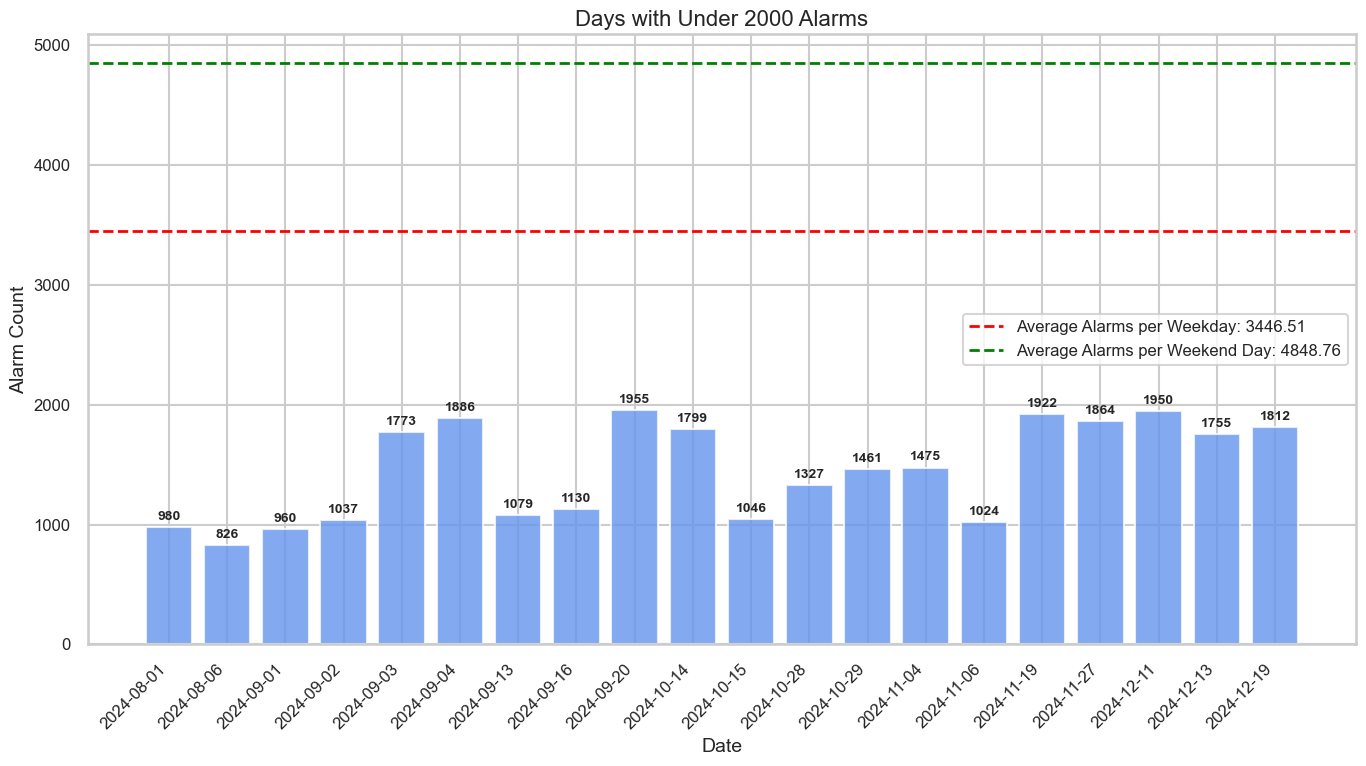

In [44]:
import matplotlib.pyplot as plt

# Group by date and count alarms per day
daily_counts = filtered_df.groupby(filtered_df['Event Date'].dt.date).size()

# Filter for days with fewer than 2000 alarms
under_2000 = daily_counts[daily_counts < 2000]

# Plot the days with their actual alarm counts
plt.figure(figsize=(14, 8))
bars = plt.bar(under_2000.index.astype(str), under_2000.values, color='cornflowerblue', alpha=0.8)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Alarm Count", fontsize=14)
plt.title("Days with Under 2000 Alarms", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Annotate each bar with its count
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add reference lines for average alarms per weekday and weekend day
plt.axhline(y=average_alarms_per_weekday, color='red', linestyle='--', linewidth=2, label=f'Average Alarms per Weekday: {average_alarms_per_weekday:.2f}')
plt.axhline(y=average_alarms_per_weekend_day, color='green', linestyle='--', linewidth=2, label=f'Average Alarms per Weekend Day: {average_alarms_per_weekend_day:.2f}')

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\KabeerMotwani\AppData\Local\Temp\ipykernel_20512\901059056.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Event Date'] = pd.to_datetime(filtered_df['Event Date'], errors='coerce')
C:\Users\KabeerMotwani\AppData\Local\Temp\ipykernel_20512\901059056.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Handling Time'] = pd.to_timedelta(filtered_df['Handling Time'])
C:\Users\KabeerMotwani\AppData\Local\Temp\ipykernel_20512\901059056.py:34: SettingWithCopyWarning: 
A valu

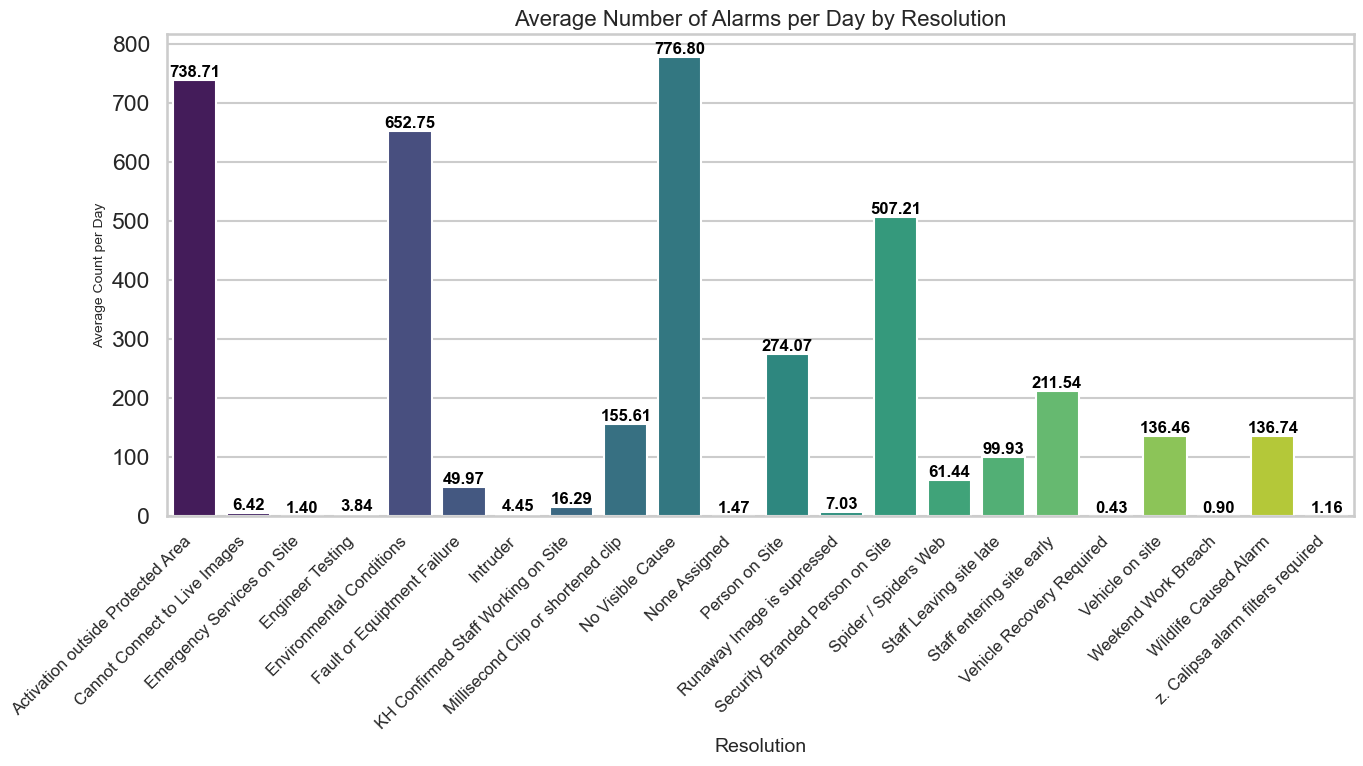

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set a beautiful plotting style suitable for a high-level presentation
sns.set(style="whitegrid", context="talk", palette="muted")

# Ensure 'Event Date' is in datetime format
filtered_df['Event Date'] = pd.to_datetime(filtered_df['Event Date'], errors='coerce')

# Convert 'Handling Time' to timedelta if it's not already
filtered_df['Handling Time'] = pd.to_timedelta(filtered_df['Handling Time'])

# Group by each day (date only) and by the 'Resolution' column, counting alarms per group
daily_resolution_counts = (
    filtered_df.groupby([filtered_df['Event Date'].dt.date, 'Resolution'])
               .size()
               .reset_index(name='Count')
)

# Calculate the average daily count per resolution
avg_daily_by_resolution = daily_resolution_counts.groupby('Resolution')['Count'].mean().sort_values()

# Calculate average response time per resolution in minutes
avg_response_time = (
    filtered_df.groupby('Resolution')['Handling Time']
    .mean()
    .reset_index()
)
avg_response_time['Handling Time (minutes)'] = avg_response_time['Handling Time'].dt.total_seconds() / 60

# Calculate average number of each resolution per day
filtered_df['DateOnly'] = pd.to_datetime(filtered_df['Event Date']).dt.date
avg_resolution_per_day = (
    filtered_df.groupby('Resolution').size() / filtered_df['DateOnly'].nunique()
).reset_index(name='Average Count per Day')

# Merge the two DataFrames on Resolution
merged_df = pd.merge(avg_response_time, avg_resolution_per_day, on='Resolution')

# Create the plot with enhanced aesthetics and proper x-axis alignment
plt.figure(figsize=(14, 8))
barplot = sns.barplot(
    data=avg_resolution_per_day, 
    x='Resolution', 
    y='Average Count per Day', 
    palette='viridis'
)
plt.title('Average Number of Alarms per Day by Resolution', fontsize=16)
plt.xlabel('Resolution', fontsize=14)
plt.ylabel('Average Count per Day', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=12)

# Annotate each bar with the actual average count value
for index, row in avg_resolution_per_day.iterrows():
    barplot.text(
        index, 
        row['Average Count per Day'] + 0.05,  # slight vertical offset above the bar
        f'{row["Average Count per Day"]:.2f}', 
        color='black', 
        ha="center", 
        va="bottom",
        fontsize=12,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

C:\Users\KabeerMotwani\AppData\Local\Temp\ipykernel_20512\1012786513.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Handling Time'] = pd.to_timedelta(filtered_df['Handling Time'])
C:\Users\KabeerMotwani\AppData\Local\Temp\ipykernel_20512\1012786513.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['DateOnly'] = pd.to_datetime(filtered_df['Event Date']).dt.date
C:\Users\KabeerMotwani\AppData\Local\Temp\ipykernel_20512\1012786513.py:16: FutureWarning: 

Passing `palette` withou

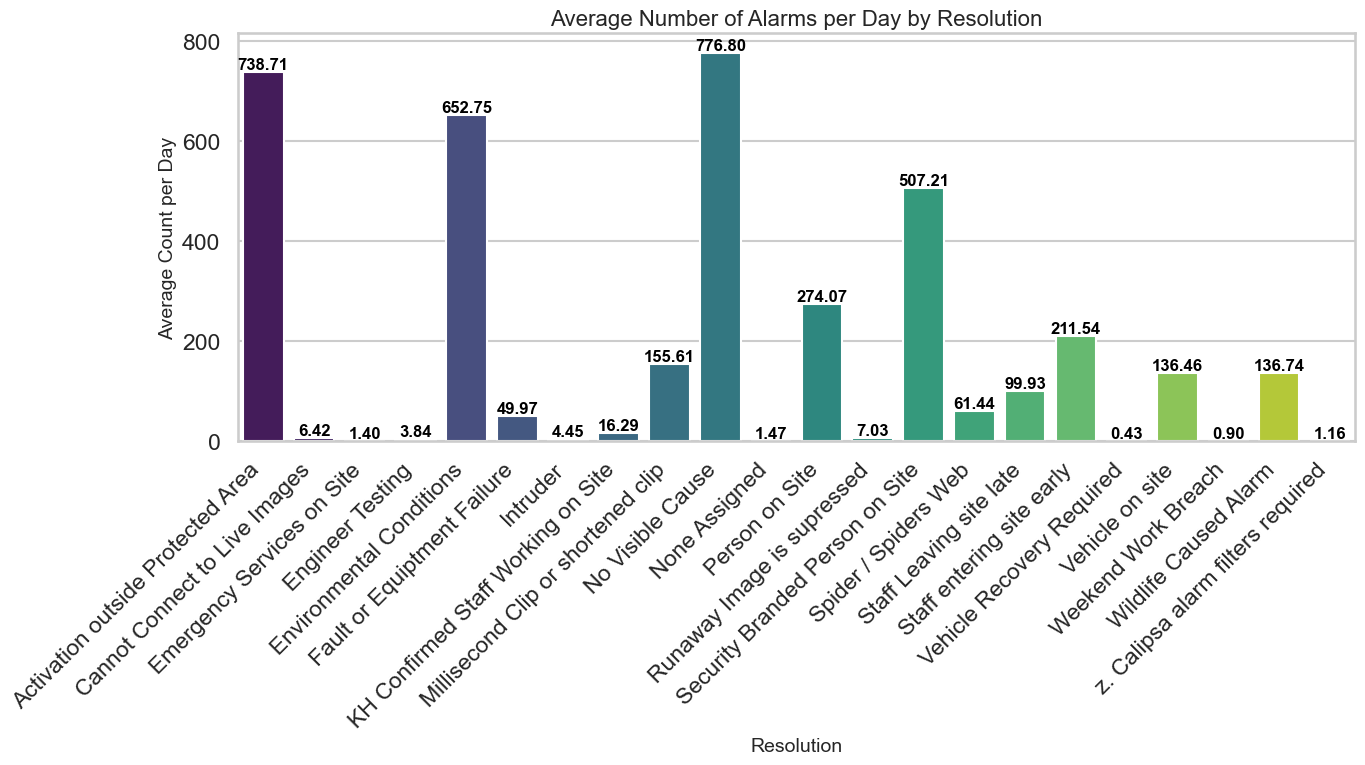

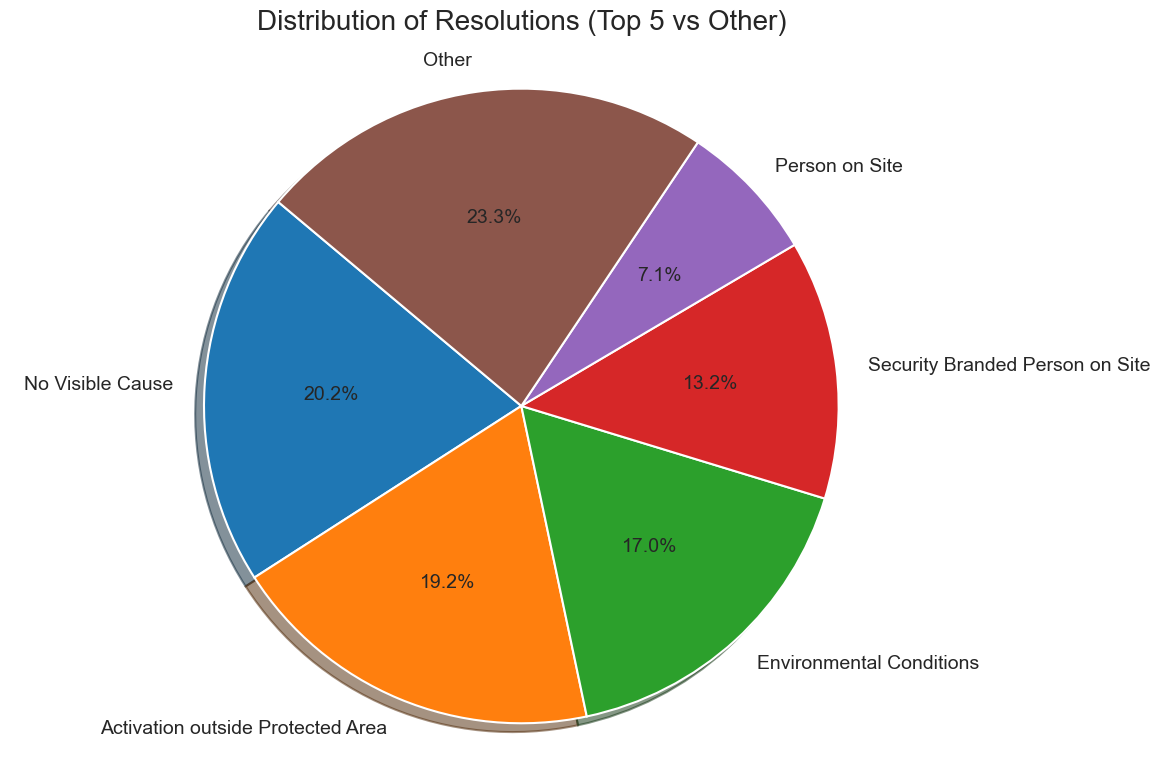

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Handling Time' to timedelta if needed (kept for context; may not be used in this plot)
filtered_df['Handling Time'] = pd.to_timedelta(filtered_df['Handling Time'])

# Calculate average number of each resolution per day
filtered_df['DateOnly'] = pd.to_datetime(filtered_df['Event Date']).dt.date
avg_resolution_per_day = (
    filtered_df.groupby('Resolution').size() / filtered_df['DateOnly'].nunique()
).reset_index(name='Average Count per Day')

# Use seaborn to produce an attractive bar plot with x-axis as Resolution and y-axis as Average Count per Day
plt.figure(figsize=(14, 8))
barplot = sns.barplot(
    data=avg_resolution_per_day, 
    x='Resolution', 
    y='Average Count per Day', 
    palette='viridis'
)
plt.title('Average Number of Alarms per Day by Resolution', fontsize=16)
plt.xlabel('Resolution', fontsize=14)
plt.ylabel('Average Count per Day', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Annotate each bar with the actual average count value
for index, row in avg_resolution_per_day.iterrows():
    barplot.text(
        index, 
        row['Average Count per Day'] + 0.05,  # slight vertical offset above the bar
        f'{row["Average Count per Day"]:.2f}', 
        color='black', 
        ha="center", 
        va="bottom",
        fontsize=12,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

# Count the occurrences of each resolution from the filtered DataFrame
resolution_counts = filtered_df['Resolution'].value_counts()

# Get top five resolutions and aggregate the rest as 'Other'
top_five = resolution_counts.nlargest(5)
other_count = resolution_counts.iloc[5:].sum()

labels = list(top_five.index) + ['Other']
sizes = list(top_five.values) + [other_count]

# Use a high-contrast palette (matplotlib's tab10) for distinctly different colors
custom_colors = plt.cm.tab10(range(len(labels)))

# Plot a pie chart without a hole in the middle
plt.figure(figsize=(12, 8))
plt.pie(sizes, 
        labels=labels, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=custom_colors,
        shadow=True,
        textprops={'fontsize': 14})

plt.title('Distribution of Resolutions (Top 5 vs Other)', fontsize=20, pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

C:\Users\KabeerMotwani\AppData\Local\Temp\ipykernel_20512\1138400992.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  combined_df['Event Date'] = pd.to_datetime(combined_df['Event Date'], errors='coerce')


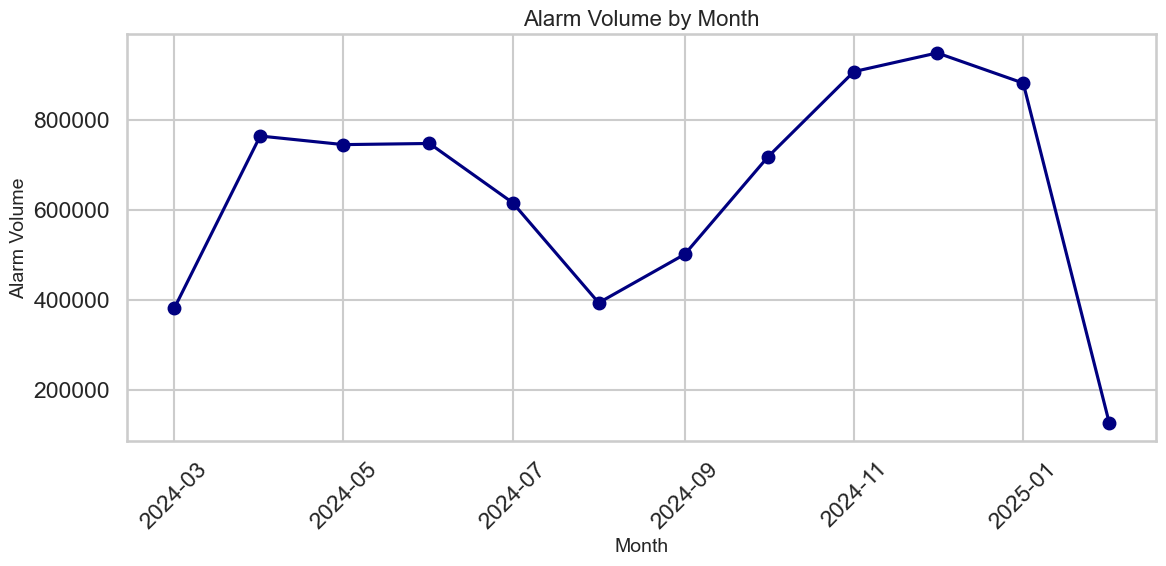

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Event Date' is in datetime format
combined_df['Event Date'] = pd.to_datetime(combined_df['Event Date'], errors='coerce')

# Group by month (using year-month period) and count the number of alarms per month
monthly_counts = (
    combined_df.groupby(combined_df['Event Date'].dt.to_period('M'))
               .size()
               .reset_index(name='Count')
)

# Convert the Period to a timestamp for plotting
monthly_counts['Event Date'] = monthly_counts['Event Date'].dt.to_timestamp()

# Plot the monthly alarm volume
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts['Event Date'], monthly_counts['Count'], marker='o', linestyle='-', color='navy')
plt.title("Alarm Volume by Month", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Alarm Volume", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [55]:
import pandas as pd

# Ensure 'Event Date' is in datetime format
combined_df['Event Date'] = pd.to_datetime(combined_df['Event Date'], errors='coerce')

# Filter for site 'George Leslie'
site_df = combined_df[combined_df['Link Account'] == 'George Leslie']

# Define date ranges (start and end dates); using ISO format for dates
date_ranges = {
    "01/04/2024-30/06/2024": ("2024-04-01", "2024-06-30"),
    "01/07/2024-30/09/2024": ("2024-07-01", "2024-09-30"),
    "01/10/2024-31/12/2024": ("2024-10-01", "2024-12-31"),
    "01/01/2025-31/03/2025": ("2025-01-01", "2025-03-31"),
}

# Loop through each date range, filter for non-null 'Handling Time', and print the alarm count
for label, (start_date, end_date) in date_ranges.items():
    mask = (
        (site_df['Event Date'] >= start_date) &
        (site_df['Event Date'] <= end_date) &
        (site_df['Handling Time'].notnull())
    )
    count = site_df.loc[mask].shape[0]
    print(f"Alarms for {label}: {count}")


Alarms for 01/04/2024-30/06/2024: 2020
Alarms for 01/07/2024-30/09/2024: 5234
Alarms for 01/10/2024-31/12/2024: 10704
Alarms for 01/01/2025-31/03/2025: 3110


In [57]:
import pandas as pd

# Ensure 'Event Date' is in datetime format and 'Handling Time' is converted to a timedelta
combined_df['Event Date'] = pd.to_datetime(combined_df['Event Date'], errors='coerce')
combined_df['Handling Time'] = pd.to_timedelta(combined_df['Handling Time'], errors='coerce')

# Filter for records from George Leslie which have a non-null Handling Time (i.e., valid alarms)
gl_df = combined_df[(combined_df['Link Account'] == 'George Leslie') &
                     (combined_df['Handling Time'].notnull())]

# Display the raw data for 'George Leslie' site with non-null 'Handling Time'
print("Raw data for 'George Leslie' site with non-null 'Handling Time':")
print(gl_df.head())

# Identify rows with massive handling times (e.g., greater than 1 day)
massive_handling_times = gl_df[gl_df['Handling Time'] > pd.Timedelta(days=1)]

print("\nRows with massive handling times (greater than 1 day):")
print(massive_handling_times)

# Group the data by quarter based on 'Event Date' and sum the Handling Times for each quarter
quarterly_resolution_time = (
    gl_df.groupby(gl_df['Event Date'].dt.to_period('Q'))['Handling Time']
         .sum()
         .reset_index()
)

# Optionally, convert the total resolution time to hours for easier interpretation
quarterly_resolution_time['Total Hours'] = quarterly_resolution_time['Handling Time'].apply(lambda td: td.total_seconds() / 3600)

print("Total Resolution Time per Quarter for George Leslie alarms:")
print(quarterly_resolution_time)


Raw data for 'George Leslie' site with non-null 'Handling Time':
                          Site Name Post Code   Link Account Event Date  \
15277  Elvanfoot Sub-Station TM155D  ML12 6TE  George Leslie 2024-03-14   
15279  Elvanfoot Sub-Station TM155D  ML12 6TE  George Leslie 2024-03-14   
15280  Elvanfoot Sub-Station TM155D  ML12 6TE  George Leslie 2024-03-15   
15282  Elvanfoot Sub-Station TM155D  ML12 6TE  George Leslie 2024-03-15   
15283  Elvanfoot Sub-Station TM155D  ML12 6TE  George Leslie 2024-03-15   

      Event Time                                       Event Detail  \
15277   18:43:05  Line Crossed T:TM155D(1) A:1 C:13 Cam 13 2024/...   
15279   21:37:30  Line Crossed T:TM155D(1) A:1 C:12 Cam 12 2024/...   
15280   00:21:27  Line Crossed T:TM155D(1) A:1 C:12 Cam 12 2024/...   
15282   02:32:38  Line Crossed T:TM155D(1) A:1 C:12 Cam 12 2024/...   
15283   04:20:08  Line Crossed T:TM155D(1) A:1 C:12 Cam 12 2024/...   

                     Resolution   Handling Time     Insta

In [58]:
# Assuming previous cells have been run and gl_df is defined as:
# gl_df = combined_df[(combined_df['Link Account'] == 'George Leslie') &
#                      (combined_df['Handling Time'].notnull())]

# Sort by Handling Time descending and select the top 10 records
top_ten = gl_df.sort_values(by='Handling Time', ascending=False).head(10)

print("Top 10 Largest Handling Times for George Leslie:")
print(top_ten[['Event Date', 'Handling Time']])

Top 10 Largest Handling Times for George Leslie:
        Event Date   Handling Time
2585384 2024-06-28 0 days 08:56:27
1372898 2024-05-12 0 days 06:59:15
5329188 2024-11-16 0 days 06:53:56
5264161 2024-11-14 0 days 05:46:08
5424182 2024-11-19 0 days 05:33:52
5294348 2024-11-15 0 days 05:20:36
5424187 2024-11-19 0 days 05:06:11
4431364 2024-10-11 0 days 04:59:55
6652833 2024-12-28 0 days 04:48:04
5451431 2024-11-20 0 days 04:45:10


In [60]:
# Filter the George Leslie data for records in Q4 (October, November, December)
q4_gl_df = gl_df[gl_df['Event Date'].dt.quarter == 4]

# Display all handling times for Q4
print("Handling Times for George Leslie for Q4:")
print(q4_gl_df[['Event Date', 'Handling Time']])

# Sum the handling times for George Leslie in Q4
q4_total_handling_time = q4_gl_df['Handling Time'].sum()

print("Total Handling Time for George Leslie in Q4:", q4_total_handling_time)

Handling Times for George Leslie for Q4:
        Event Date   Handling Time
4150422 2024-10-01 0 days 00:00:42
4150424 2024-10-01 0 days 00:00:22
4150425 2024-10-01 0 days 00:08:18
4150427 2024-10-01 0 days 00:07:58
4152425 2024-10-01 0 days 00:02:07
...            ...             ...
6737665 2024-12-31 0 days 00:00:18
6737666 2024-12-31 0 days 00:00:51
6737669 2024-12-31 0 days 00:08:01
6738580 2024-12-31 0 days 00:18:53
6738581 2024-12-31 0 days 00:17:03

[10704 rows x 2 columns]
Total Handling Time for George Leslie in Q4: 106 days 03:22:07


In [61]:
import pandas as pd

# Ensure 'Event Date' is in datetime format in case it isn't already
combined_df['Event Date'] = pd.to_datetime(combined_df['Event Date'], errors='coerce')

# Filter all alarms for Q4 (October, November, December)
q4_df = combined_df[combined_df['Event Date'].dt.quarter == 4]

# Count total alarms in Q4
total_q4_alarms = q4_df.shape[0]

# Filter for George Leslie alarms in Q4
gl_q4_df = q4_df[q4_df['Link Account'] == 'George Leslie']
gl_q4_alarms = gl_q4_df.shape[0]

# Calculate percentage of Q4 alarms that are George Leslie
percentage_gl = (gl_q4_alarms / total_q4_alarms) * 100 if total_q4_alarms else 0

print(f"George Leslie alarms in Q4: {gl_q4_alarms}")
print(f"Total alarms in Q4: {total_q4_alarms}")
print(f"Percentage of alarms that are George Leslie in Q4: {percentage_gl:.2f}%")

George Leslie alarms in Q4: 86447
Total alarms in Q4: 2576682
Percentage of alarms that are George Leslie in Q4: 3.35%


In [62]:
import pandas as pd

# Ensure 'Event Date' is in datetime format (if not already)
combined_df['Event Date'] = pd.to_datetime(combined_df['Event Date'], errors='coerce')

# Filter for alarms in Q4 (October, November, December)
q4_df = combined_df[combined_df['Event Date'].dt.quarter == 4]

# Sum the total handling time for all alarms in Q4
total_handling_time_q4 = q4_df['Handling Time'].sum()

print("Total Handling Time for all alarms in Q4:", total_handling_time_q4)

Total Handling Time for all alarms in Q4: 2509 days 01:13:26


In [63]:
# Print out the timedelta components (days, hours, minutes, seconds) for a few Handling Time values
print("Timedelta components for sample Handling Time values:")
print(gl_df['Handling Time'].dt.components.head())

# Alternatively, convert the Handling Time values to total seconds, minutes, and hours
gl_df['Total Seconds'] = gl_df['Handling Time'].dt.total_seconds()
gl_df['Total Minutes'] = gl_df['Total Seconds'] / 60
gl_df['Total Hours'] = gl_df['Total Seconds'] / 3600

print("\nSample conversion of Handling Time to seconds, minutes, and hours:")
print(gl_df[['Handling Time', 'Total Seconds', 'Total Minutes', 'Total Hours']].head())

Timedelta components for sample Handling Time values:
       days  hours  minutes  seconds  milliseconds  microseconds  nanoseconds
15277     0      0       12       22             0             0            0
15279     0      0       12       59             0             0            0
15280     0      0       10       24             0             0            0
15282     0      0        1       22             0             0            0
15283     0      0        0       40             0             0            0

Sample conversion of Handling Time to seconds, minutes, and hours:
        Handling Time  Total Seconds  Total Minutes  Total Hours
15277 0 days 00:12:22          742.0      12.366667     0.206111
15279 0 days 00:12:59          779.0      12.983333     0.216389
15280 0 days 00:10:24          624.0      10.400000     0.173333
15282 0 days 00:01:22           82.0       1.366667     0.022778
15283 0 days 00:00:40           40.0       0.666667     0.011111


C:\Users\KabeerMotwani\AppData\Local\Temp\ipykernel_20512\3444456380.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gl_df['Total Seconds'] = gl_df['Handling Time'].dt.total_seconds()
C:\Users\KabeerMotwani\AppData\Local\Temp\ipykernel_20512\3444456380.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gl_df['Total Minutes'] = gl_df['Total Seconds'] / 60
C:\Users\KabeerMotwani\AppData\Local\Temp\ipykernel_20512\3444456380.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [54]:
import pandas as pd

# Ensure 'Event Date' is in datetime format
combined_df['Event Date'] = pd.to_datetime(combined_df['Event Date'], errors='coerce')

# Filter for George Leslie alarms with a resolution type of "Intruder"
site_df = combined_df[(combined_df['Link Account'] == 'George Leslie') &
                      (combined_df['Resolution'] == 'Intruder')]

# Group by quarter (using the 'Event Date') and count the number of intruder alarms per quarter
intruder_counts = site_df.groupby(site_df['Event Date'].dt.to_period('Q')).size().reset_index(name='Intruder Count')

print("Intruder Counts per Quarter for George Leslie:")
print(intruder_counts)

Intruder Counts per Quarter for George Leslie:
  Event Date  Intruder Count
0     2024Q2               3
1     2024Q3               1
2     2024Q4               4
